In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [3]:
df = pd.read_csv("laptop_data.csv")
df.head(4)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360


## Preprocessing :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
674,HP,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4GB,128GB SSD,Nvidia GeForce 940MX,Windows 10,1.63kg,37242.7200
766,Asus,Notebook,17.3,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.8kg,25059.7152
1249,Dell,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.24kg,96596.6400


In [9]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [10]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
737,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,1.55,35111.5200
413,Acer,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.6,42038.4528
833,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.7,63190.0800


In [11]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [13]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

<Axes: xlabel='Price', ylabel='Density'>

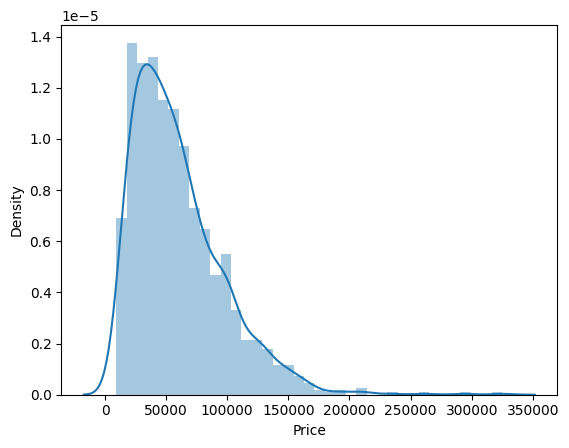

In [14]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

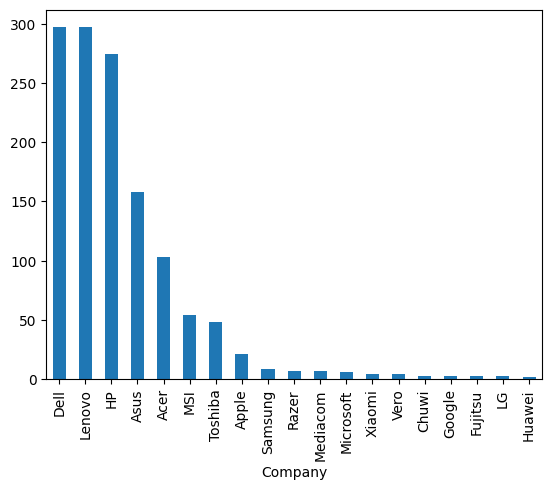

In [15]:
df['Company'].value_counts().plot(kind='bar')

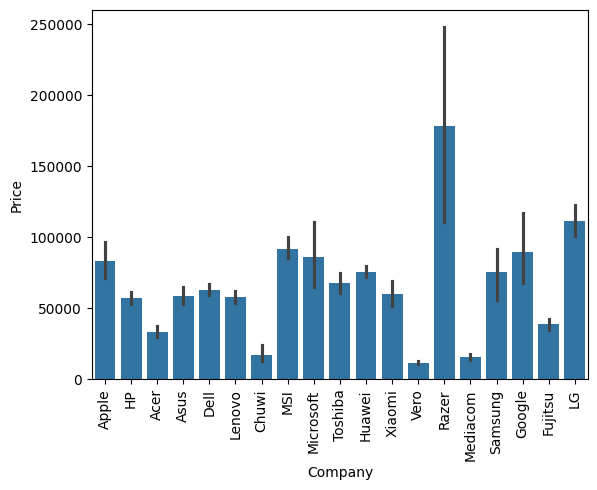

In [16]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

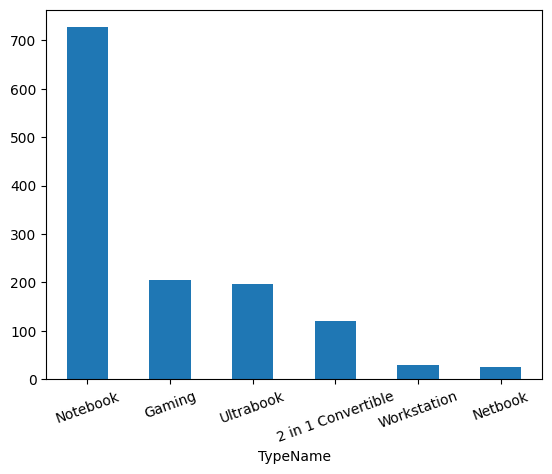

In [17]:
df['TypeName'].value_counts().plot(kind='bar')
plt.xticks(rotation=20)
plt.show()

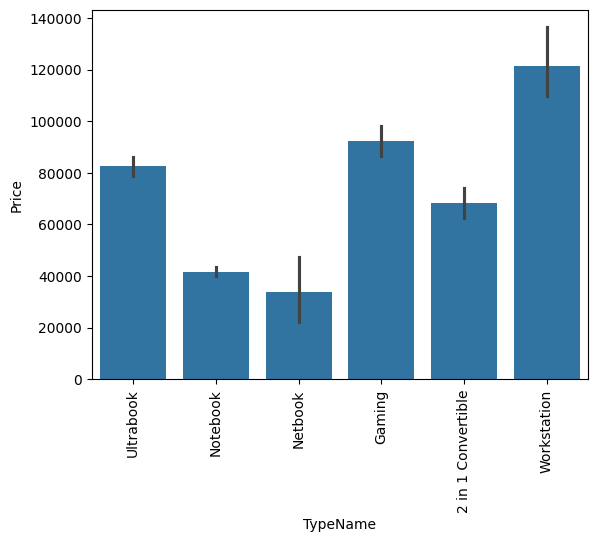

In [18]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

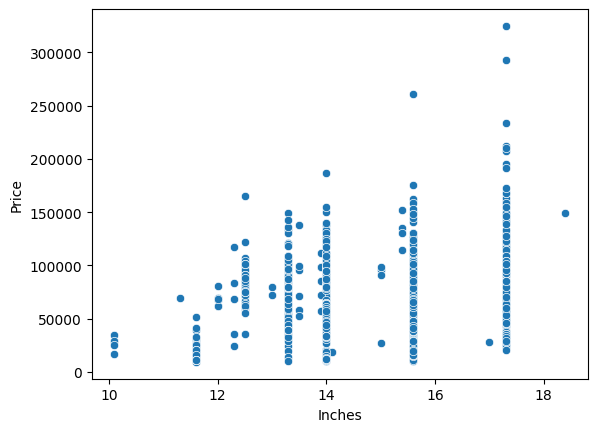

In [19]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

### Processing `ScreenResolution` Column :

In [20]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)


In [21]:
df.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1266,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,29303.4672,0
1072,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,63882.7200,0
178,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD + 1TB HDD,AMD R17M-M1-70,Windows 10,1.90,43316.6400,0
88,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.20,77202.7200,0


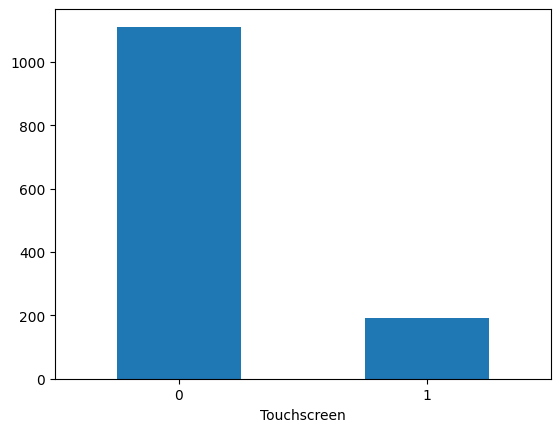

In [22]:
df['Touchscreen'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

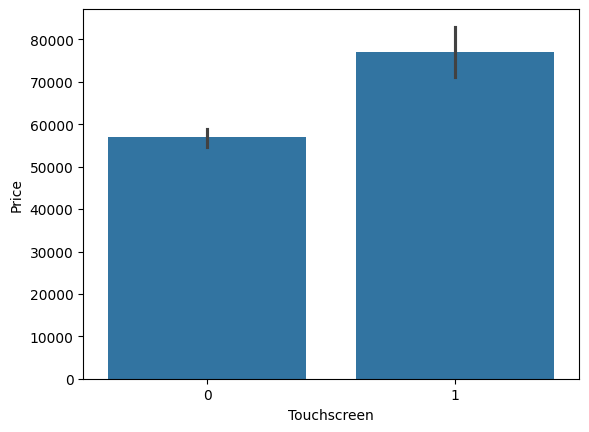

In [23]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.xticks(rotation=0)
plt.show()

In [24]:
df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)


In [25]:
df.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
17,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16,512GB SSD,AMD Radeon Pro 560,macOS,1.83,152274.2400,0,1
668,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,67026.2400,0,1
243,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56,46833.1200,0,0
1070,Dell,Notebook,15.6,1366x768,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.06,25679.8944,0,0


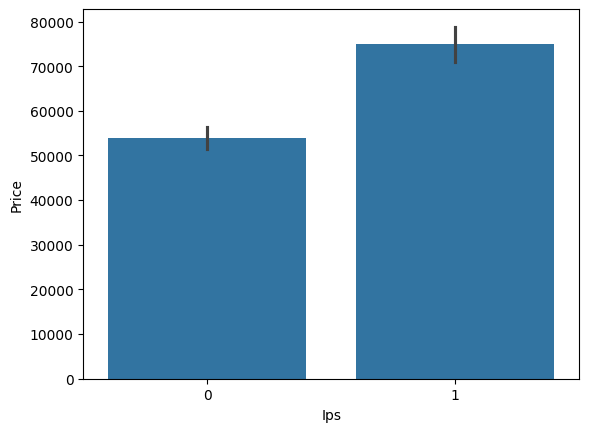

In [26]:
sns.barplot(x=df['Ips'],y=df['Price'])
plt.xticks(rotation=0)
plt.show()

In [27]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [28]:
df.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
190,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16,1TB SSD,Intel HD Graphics 620,Windows 10,1.42,150462.72,1,0,Touchscreen 2560,1440
495,Lenovo,Ultrabook,12.5,IPS Panel 1366x768,Intel Core i5 6200U 2.3GHz,8,180GB SSD,Intel HD Graphics 520,Windows 10,1.30,58554.72,0,1,IPS Panel 1366,768
399,Lenovo,Ultrabook,14.0,IPS Panel 2560x1440,Intel Core i7 7500U 2.7GHz,16,1TB SSD,Intel HD Graphics 620,Windows 10,1.13,139860.00,0,1,IPS Panel 2560,1440
276,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,2.80,58554.72,0,0,Full HD 1920,1080


In [29]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])


In [30]:
df.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
799,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,AMD Radeon R5 M420X,Windows 10,2.00,39373.92,0,0,1920,1080
1196,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M430,No OS,1.90,19607.04,0,0,1366,768
926,Lenovo,Ultrabook,12.5,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,87912.00,0,1,1920,1080
647,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,138474.72,0,0,1920,1080


In [31]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [33]:
df['ppi'] = ((df['X_res']**2 + df['Y_res']**2)**0.5 / df['Inches']).astype(float)


In [34]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
735,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.85,41505.1200,0,0,1920,1080,141.211998
166,Acer,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.10,19367.8128,0,0,1366,768,100.454670
16,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,39693.6000,0,0,1920,1080,141.211998


In [35]:
df.drop(columns=['ScreenResolution'],inplace=True)
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [36]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
853,Lenovo,Ultrabook,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GT 940MX,Windows 10,1.96,101391.84,0,1,157.350512
1118,Toshiba,Ultrabook,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.05,118601.28,0,0,165.632118
118,Asus,Notebook,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.00,30049.92,0,0,127.335675


### Processing `Cpu` Column :

In [37]:
df['CpuName'] = df['Cpu'].apply(lambda x : " ".join(x.split()[0:3]))

In [38]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CpuName
115,HP,2 in 1 Convertible,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.26,74538.1872,1,1,165.632118,Intel Core i5
164,Acer,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.10,18541.4400,0,0,100.454670,Intel Celeron Dual
44,Dell,2 in 1 Convertible,Intel Core i5 8250U 1.6GHz,12,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77,53226.7200,1,0,127.335675,Intel Core i5


In [39]:
def fetch_processor(text):
    if (text =='Intel Core i7') or (text=='Intel Core i5') or text == ('Intel Core i3'):
        return text
    
    elif (text.split()[0])=='Intel':
        return 'Other Intel Processor'
    
    else:
        return 'AMD Processor'

In [40]:
df['Cpu brand'] = df['CpuName'].apply(fetch_processor)

In [41]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CpuName,Cpu brand
633,Lenovo,Notebook,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.20,30849.12,0,0,141.211998,Intel Core i3,Intel Core i3
261,Lenovo,Notebook,Intel Core i3 6006U 2GHz,4,256GB SSD,Intel HD Graphics 520,No OS,2.20,23656.32,0,0,141.211998,Intel Core i3,Intel Core i3
1181,Lenovo,Ultrabook,Intel Core i7 7500U 2.7GHz,6,256GB SSD,Nvidia GeForce 920M,Windows 10,1.54,44275.68,0,0,141.211998,Intel Core i7,Intel Core i7


<Axes: xlabel='Cpu brand'>

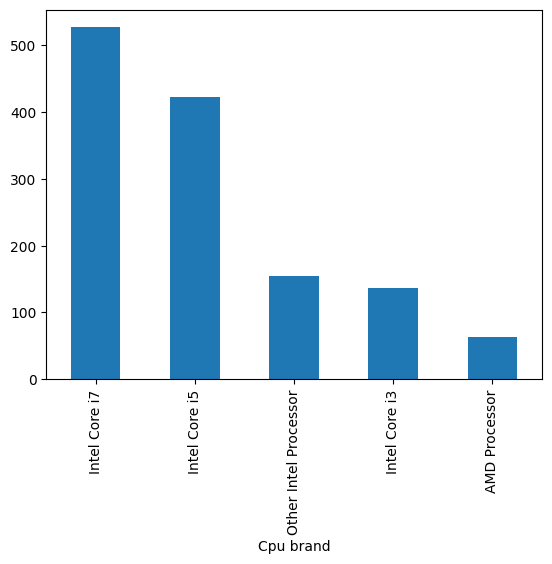

In [42]:
df['Cpu brand'].value_counts().plot(kind='bar')

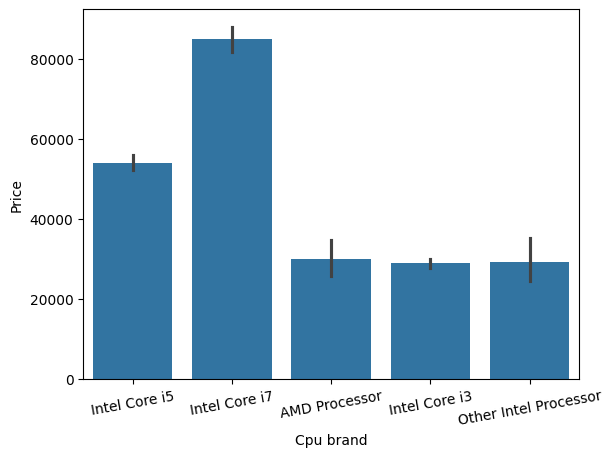

In [43]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation=10)
plt.show()

In [44]:
df.drop(columns=['Cpu','CpuName'],inplace=True)

In [45]:
df.sample(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
786,MSI,Gaming,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,58021.9200,0,0,141.211998,Intel Core i5
1067,Dell,2 in 1 Convertible,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.62,42517.9728,1,0,165.632118,Intel Core i7
679,Acer,Gaming,16,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,69210.7200,0,0,141.211998,Intel Core i5


<Axes: xlabel='Ram'>

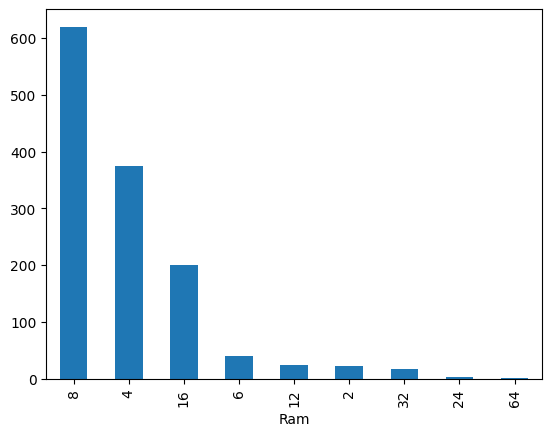

In [46]:
df['Ram'].value_counts().plot(kind='bar')

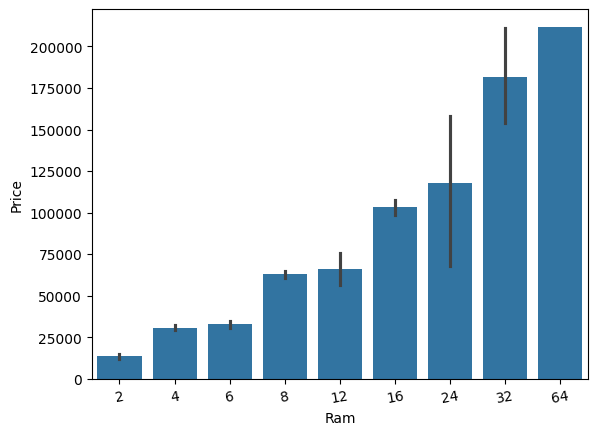

In [47]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation=10)
plt.show()

### Processing `Memory` Column :

In [48]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

# ensure columns are strings first
df['first'] = df['first'].astype(str)
df['second'] = df['second'].astype(str)

# extract the first numeric group from each value (e.g. "128 SSD" -> "128")
df['first_num'] = df['first'].str.extract(r'(\d+)', expand=False)
df['second_num'] = df['second'].str.extract(r'(\d+)', expand=False)

# convert to numeric safely (non-matching -> NaN), then fill NaN with 0 and cast to int
df['first_num'] = pd.to_numeric(df['first_num'], errors='coerce').fillna(0).astype(int)
df['second_num'] = pd.to_numeric(df['second_num'], errors='coerce').fillna(0).astype(int)

# If you still need the indicator columns (HDD/SSD/Hybrid/Flash) use original text checks:
df["Layer1HDD"] = df["first"].str.contains("HDD", na=False).astype(int)
df["Layer1SSD"] = df["first"].str.contains("SSD", na=False).astype(int)
df["Layer1Hybrid"] = df["first"].str.contains("Hybrid", na=False).astype(int)
df["Layer1Flash_Storage"] = df["first"].str.contains("Flash Storage", na=False).astype(int)

df["Layer2HDD"] = df["second"].str.contains("HDD", na=False).astype(int)
df["Layer2SSD"] = df["second"].str.contains("SSD", na=False).astype(int)
df["Layer2Hybrid"] = df["second"].str.contains("Hybrid", na=False).astype(int)
df["Layer2Flash_Storage"] = df["second"].str.contains("Flash Storage", na=False).astype(int)

# compute capacity columns
df["HDD"] = df["first_num"] * df["Layer1HDD"] + df["second_num"] * df["Layer2HDD"]
df["SSD"] = df["first_num"] * df["Layer1SSD"] + df["second_num"] * df["Layer2SSD"]
df["Hybrid"] = df["first_num"] * df["Layer1Hybrid"] + df["second_num"] * df["Layer2Hybrid"]
df["Flash_Storage"] = df["first_num"] * df["Layer1Flash_Storage"] + df["second_num"] * df["Layer2Flash_Storage"]

# drop temp columns if you want
df.drop(columns=['first', 'second', 'first_num', 'second_num',
                 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
                 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'],
        inplace=True, errors='ignore')


In [49]:
df.sample(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
342,HP,Notebook,8,1000 HDD,Nvidia GeForce 930MX,Windows 10,2.10,38148.48,0,1,141.211998,Intel Core i3,1000,0,0,0
890,HP,Notebook,4,128 SSD,Intel HD Graphics 620,Windows 10,1.95,67399.20,0,0,157.350512,Intel Core i5,0,128,0,0
349,Dell,Ultrabook,8,1000 HDD,AMD Radeon 530,Windows 10,1.90,35324.64,0,0,141.211998,Intel Core i5,1000,0,0,0


In [50]:
df.drop(columns=['Memory'],inplace=True)

In [51]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [52]:
df.sample(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
384,Asus,Ultrabook,16,Intel HD Graphics 620,Windows 10,1.10,93181.392,1,0,165.632118,Intel Core i7,0,512
486,Dell,Workstation,16,Nvidia Quadro M620,Windows 10,2.17,124568.640,0,1,141.211998,Intel Core i7,0,512
869,Dell,Workstation,8,Nvidia Quadro M620,Windows 10,2.23,94731.840,0,0,141.211998,Intel Core i7,1000,0


### Processing `Gpu` Column :

In [53]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [54]:
df.sample(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
389,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 620,Windows 10,1.42,133679.5200,1,0,209.800683,Intel Core i7,0,512,Intel
404,MSI,Gaming,16,Nvidia GeForce GTX 1070,Windows 10,2.80,119826.7200,0,0,127.335675,Intel Core i7,1000,256,Nvidia
347,Dell,Ultrabook,16,Intel UHD Graphics 620,Windows 10,1.88,85672.1088,0,0,141.211998,Intel Core i7,0,768,Intel


In [55]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [56]:
df = df[df['Gpu brand'] != 'ARM']

In [57]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

<Axes: xlabel='Gpu brand', ylabel='Price'>

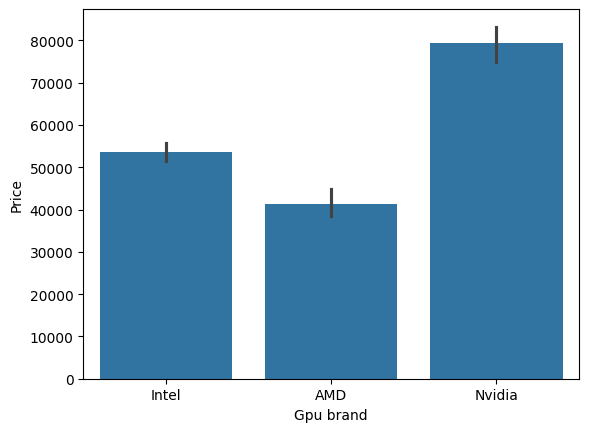

In [58]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])

In [59]:
df.drop(columns=['Gpu'],inplace=True)

In [60]:
df.sample(3)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
342,HP,Notebook,8,Windows 10,2.10,38148.4800,0,1,141.211998,Intel Core i3,1000,0,Nvidia
789,Dell,Gaming,8,Windows 10,2.62,52480.8000,0,0,141.211998,Intel Core i5,0,256,Nvidia
758,Dell,Gaming,16,Windows 10,4.42,152859.7872,0,1,282.423996,Intel Core i7,1000,256,Nvidia


### Processing `OpSys` Column :

In [61]:
def cat_os(inp):
    if (inp=='Windows 10') or (inp=='Windows 7') or (inp=='Windows 10 S'):
        return 'Windows'
    
    elif inp=='macOS' or inp=='Mac OS X':
        return 'Mac'
    
    else:
        return 'Others/No OS/Linux'

In [62]:
df['os'] = df['OpSys'].apply(cat_os)

In [63]:
df.sample(3)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
690,Acer,Notebook,4,Chrome OS,1.45,19980.00,0,0,111.935204,Other Intel Processor,0,0,Intel,Others/No OS/Linux
363,HP,Notebook,8,Windows 10,1.86,34045.92,0,0,141.211998,Intel Core i5,1000,0,Intel,Windows
1166,Lenovo,Notebook,8,Windows 10,1.95,74059.20,0,1,141.211998,Intel Core i5,0,256,Intel,Windows


In [64]:
df.drop(columns=['OpSys'],inplace=True)

In [65]:
df.sample(3)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
1099,Asus,Gaming,16,4.30,122490.72,0,1,127.335675,Intel Core i7,1000,128,Nvidia,Windows
121,MSI,Gaming,16,1.80,119427.12,0,0,141.211998,Intel Core i7,2000,256,Nvidia,Windows
89,Dell,Ultrabook,8,1.21,87858.72,0,1,165.632118,Intel Core i7,0,256,Intel,Windows


<Axes: xlabel='os', ylabel='Price'>

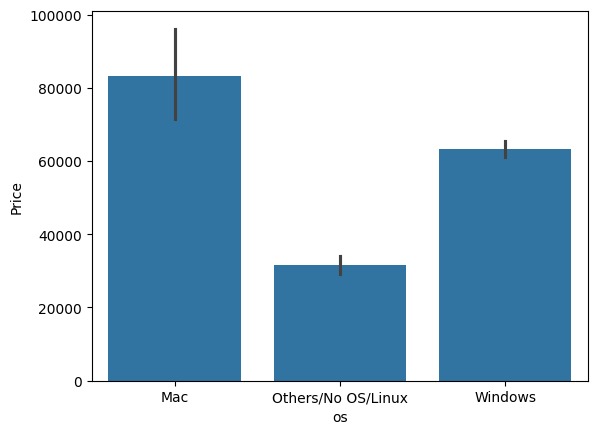

In [66]:
sns.barplot(x=df['os'],y=df['Price'])

<Axes: xlabel='Weight', ylabel='Price'>

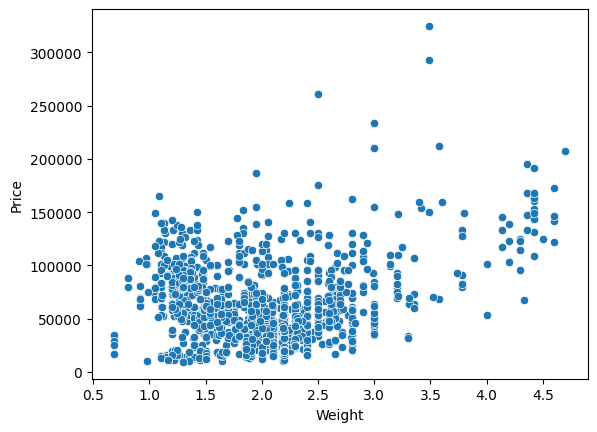

In [67]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

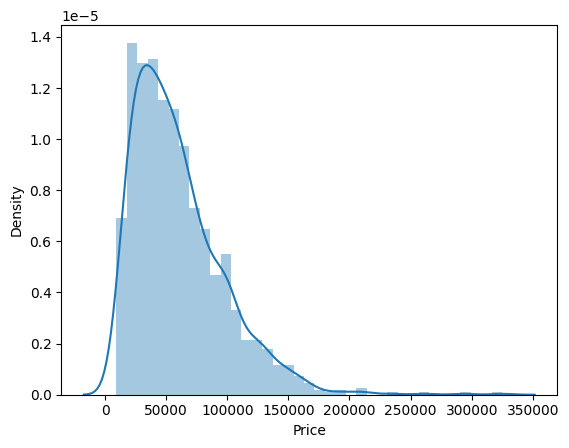

In [68]:
sns.distplot(df['Price'])    # Skewed Distribution

In [69]:
X = df.drop(columns=['Price'])

y = np.log(df['Price'])    # Log Transform (To reduce Skewness)

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

X_train.shape  , X_test.shape

((1106, 12), (196, 12))

## Linear Regression :

In [71]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.807327744841867
MAE 0.2101782797642868


## Ridge Regression :

In [72]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8127331031311809
MAE 0.20926802242582973


## Lasso Regression :

In [73]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071853945317105
MAE 0.21114361613472565


## KNN :

In [74]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.803148868705085
MAE 0.19264883332948868


## Decision Tree :

In [75]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8304951762132625
MAE 0.18700682918914002


## SVM :

In [76]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8083180902283282
MAE 0.2023905942725167


## Random Forest :

In [77]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8873402378382488
MAE 0.15860130110457718


## Extra Trees :

In [78]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap=True)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8850720167552375
MAE 0.16154538000217084


## AdaBoost :

In [79]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7816723686453224
MAE 0.23565199708121443


## Gradient Boost :

In [80]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8817489879298743
MAE 0.15980558788222768


## XG Boost :

In [81]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8771404806375557
MAE 0.16262936288951352


## Voting Regressor :

In [82]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe_final = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_final.fit(X_train,y_train)

y_pred = pipe_final.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8890063263689979
MAE 0.15883323950288708


## Stacking :

In [83]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8780681086073979
MAE 0.16644907001217724


## Exporting the Model :

In [ ]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe_final,open('pipe.pkl','wb'))  # Using Voting Regressor